# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sinasc_RO = pd.read_csv('sinasc_RO_2019.csv')
sinasc_RO.head(3)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

<AxesSubplot:xlabel='APGAR5_cat', ylabel='count'>

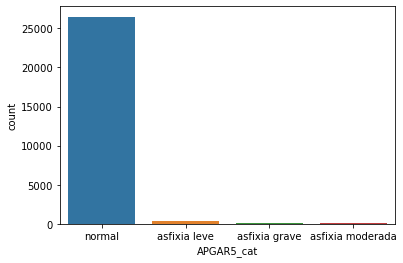

In [3]:
sinasc_RO.loc[sinasc_RO['APGAR5'] <= 3,
              'APGAR5_cat'] = 'asfixia grave'
sinasc_RO.loc[(sinasc_RO['APGAR5'] >= 4) & (sinasc_RO['APGAR5'] <= 5),
              'APGAR5_cat'] = 'asfixia moderada'
sinasc_RO.loc[(sinasc_RO['APGAR5'] >= 6) & (sinasc_RO['APGAR5'] <= 7),
              'APGAR5_cat'] = 'asfixia leve'
sinasc_RO.loc[sinasc_RO['APGAR5'] >= 8,
              'APGAR5_cat'] = 'normal'

sns.countplot(x='APGAR5_cat', data=sinasc_RO)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

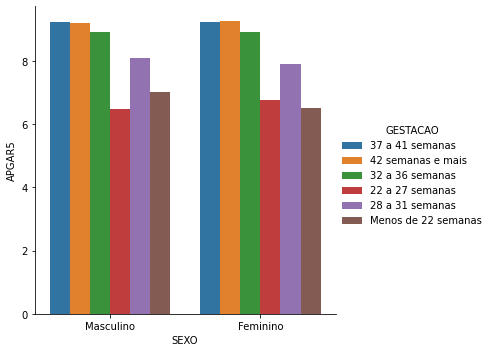

In [4]:
sns.catplot(x='SEXO', y='APGAR5'
            , hue = 'GESTACAO'
            , kind='bar'
            , data=sinasc_RO
            , ci = None
           )


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
freq = pd.crosstab(sinasc_RO['GESTACAO'], sinasc_RO['APGAR5_cat'])
freq

APGAR5_cat,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,8,73,19,2134
37 a 41 semanas,33,196,28,22266
42 semanas e mais,1,6,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
freq.sum(axis = 1)

GESTACAO
22 a 27 semanas           85
28 a 31 semanas          162
32 a 36 semanas         2234
37 a 41 semanas        22523
42 semanas e mais        698
Menos de 22 semanas        7
dtype: int64

In [7]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

APGAR5_cat,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

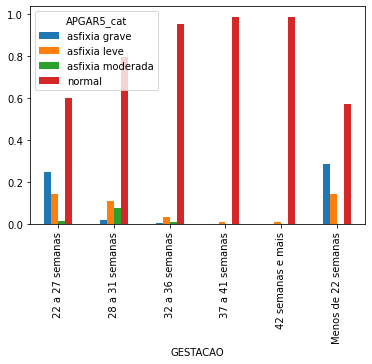

In [8]:
freq_pctlin.plot.bar()

O gráfico mostra que a incidência de asfixia começa a aumentar quando a gestação tem menos de 36 semanas, o que poderia se um indicador do desenvolvimente incompleto dos pulmões, sendo assim um parto prematuro.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='APGAR5_cat', ylabel='PESO'>

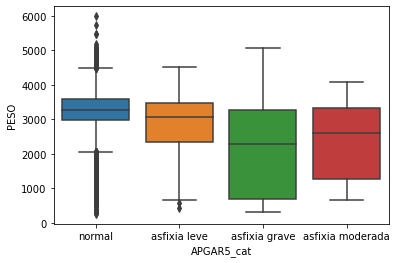

In [11]:
sns.boxplot(x='APGAR5_cat', y='PESO', data=sinasc_RO)

O gráfico acima mostra que bebês com peso abaixo de 2Kg geralmente sofrem asfixia moderada ou grave.

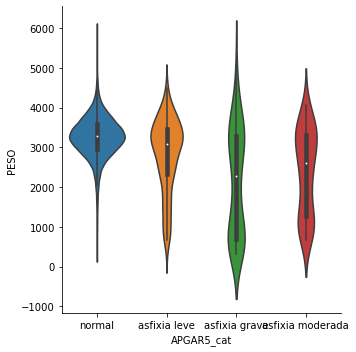

In [10]:
sns.catplot(x="APGAR5_cat", y="PESO",
            kind="violin", split=True, data=sinasc_RO)